In [6]:
function binomial_p(n,k,p)
   return (factorial(n)./(factorial(k).*factorial(n.-k)).*p.^k.*(1 .- p).^(n-k))
    
end

binomial_p (generic function with 1 method)

In [7]:
binomial_p(10, 2, 0.4)

0.12093235199999998

In [8]:
Prob_winning_the_bet=binomial_p(10,5,0.4)

0.20065812480000003

In [14]:
Prob_losing_the_bet=1 - binomial_p(10,5,0.4)

0.7993418752

In [15]:
#I would expect to lose the bet because there is only a 20% 
# of winning the bet.

In [16]:
Prob_winning_the_bet=binomial_p(10,4,0.4)

0.250822656

In [17]:
Prob_losing_the_bet=1 - Prob_winning_the_bet

0.749177344

In [18]:
#The probability of winning is greater than the previous example 
#But there is still a 25% chance of winning the bet so
#I would still expect to lose money.

In [20]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [10745b16] + Statistics
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [21]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics
using Polynomials: Polynomial, fit, coeffs
using Plots
using Random
using Statistics

In [29]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

In [30]:
line_fit=fit(x,y_observed,1)

Polynomial(-0.8231334865151646 + 2.6213621225350123*x)

In [34]:
fit_coeff=coeffs(line_fit)

2-element Vector{Float64}:
 -0.8231334865151646
  2.6213621225350123

In [36]:
function chisqr(b,m, x,y_observed,sigma)
    return sum((y_observed .- m .* x .- b) .^ 2/sigma .^2)
    
end  

chisqr (generic function with 1 method)

In [44]:
chi2_list = []
for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    fit_coeff = coeffs(Polynomials.fit(x,y_observed,1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end

In [45]:
using Statistics
mean(chi2_list)

8.93544229536065

In [46]:
#The mean value makes sense becuase the mean is 
#equal to the data points minus the coeffecients.

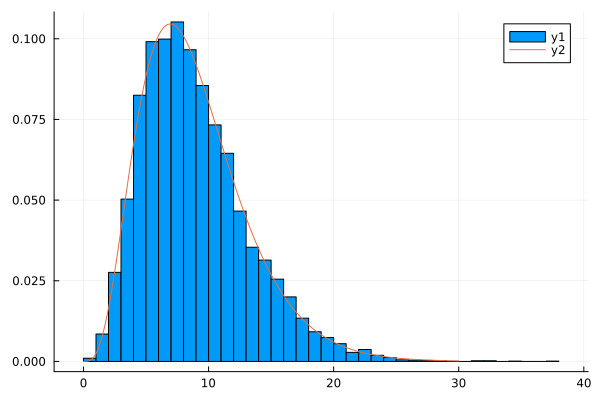

In [52]:
x_dist = 0:0.1:30
chi2 = di.Chisq(mean(chi2_list))
pdf = di.pdf.(chi2, x_dist)

Plots.histogram(chi2_list, bins = 50, normalize = true)
Plots.plot!(x_dist, pdf)

In [53]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

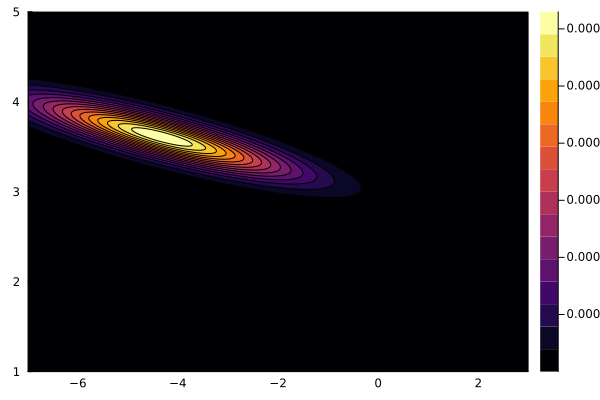

In [54]:
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range, m_range, p_chi2poly)

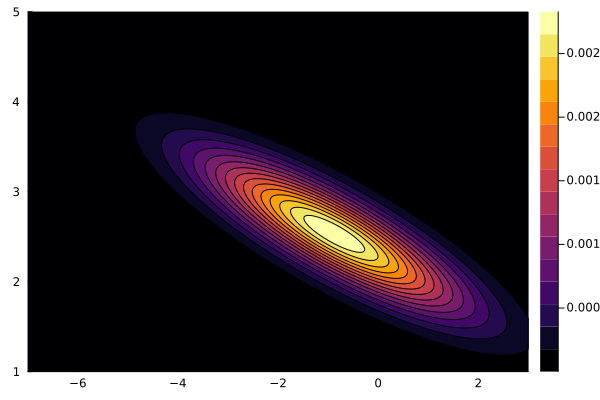

In [56]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
Plots.contourf(b_range, m_range, p_chi2poly)

In [57]:
#The contour got larger 
#and the range moved in the positive x-direction

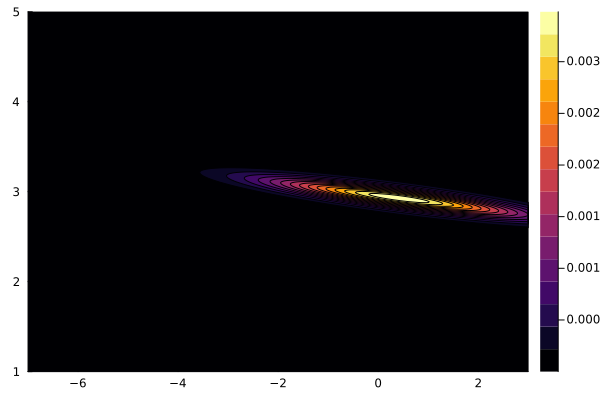

In [58]:
x = 0:2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
Plots.contourf(b_range, m_range, p_chi2poly)

In [59]:
#The range stayed the same but the contour was compressed.

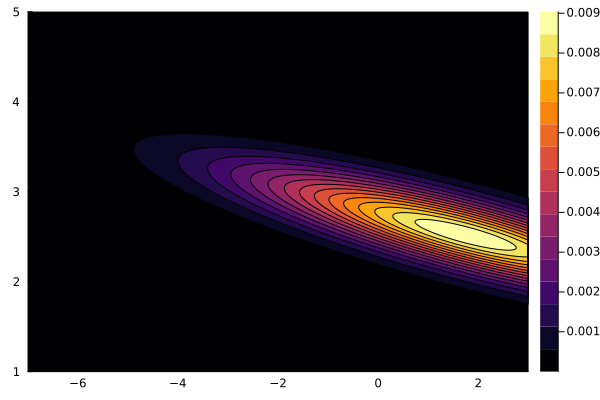

In [60]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
Plots.contourf(b_range, m_range, p_chi2poly)

In [61]:
#The contour got larger but moved in the positive x
#and negative y direction

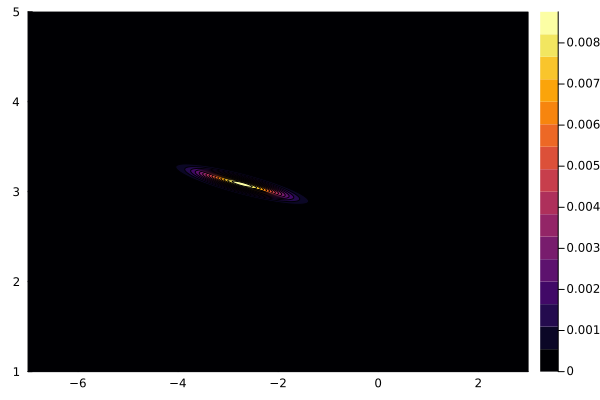

In [62]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
Plots.contourf(b_range, m_range, p_chi2poly)

In [63]:
#The contour got smaller and the range has decressed 
#significantly.